<a href="https://www.kaggle.com/code/ebrukrkkay/data-science-beginner-mode?scriptVersionId=102049491" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
## It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
## For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

## Input data files are available in the read-only "../input/" directory
## For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
## You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-challenge/pokemon.csv
/kaggle/input/pokemon-challenge/tests.csv
/kaggle/input/pokemon-challenge/combats.csv


Çalışmada kullanılacak kütüphaneler eklendikten sonra üzerinde çalışılacak Pokemon- Weedle's Cave veri setini ekliyoruz.

In [2]:
data= pd.read_csv('../input/pokemon-challenge/pokemon.csv')

Veri setinden pokemon.csv dosyasını, pandas kütüphanesinin read_csv komutu ile okuyup data değişkenine atıyoruz.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


**info()** metodu, dataframe'i görmemizi sağlıyor. Bu dosyada 800 tane pokemon olduğunu ve bu pokemonların 12 kategoride özelliklerinin bulunduğunu görebiliyoruz.

In [4]:
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


**corr()** metodu, features arasındaki bağlantıyı verir. Örneğin iki özellik arasındaki correlation 1 ise bu iki özellik doğru orantılıdır(positive correlation). Eğer correlation 0'a yakın çıkarsa bu iki özelliğin hiçbir bağlantısı olmadığı anlaşılır ve eğer -1'e yakın çıkarsa ters orantılıdır(negative correlation).

Bu kodu çalıştırdığımızda özellikler arasındaki correlation değerleri bir tablo ile gösterilirken, bu metodu **sns.heatmap()** fonksiyonu içerisinde kullanınca verileri görselleştirebiliriz.

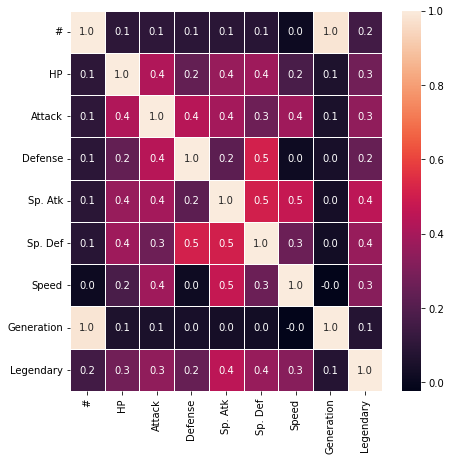

In [5]:
f,ax= plt.subplots(figsize=(7, 7))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
#annot=True değeri kutucuk değerlerini, linewidths kutucuklar arası genişliği verir, fmt='.1f' sıfırdan sonra bir basamak yazdırma anlamına gelmektedir.
#figsize ile bu şeklin boyutunu ayarlarız
plt.show()

Correlation map'i bu şekilde oluşturmuş olduk.

In [6]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Dataframe'deki baştan default olarak ilk 5 pokemonu ve özelliklerini görmemizi sağlar.
head() içerisine 10 yazarsak ilk 10 pokemonu görebiliriz.

In [7]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

Dataframe sütun isimlerini yani feature'ları verir.

**MATPLOTLIB**
verileri görselleştirme için kullandığımız kütüphanedir. Aşağıdaki grafik çeşitleri bu kütüphane içerisinde bulunan temel ve en kolay grafiklerdir.

* **Line Plot** (çizgi grafiği)= x ekseni zamanı belirttiğinde kullanmak daha iyidir.
* **Scatter Plot** (dağılım grafiği)= iki feature arasında correlation varsa  kullanmak daha iyidir.
* **Histogram Plot** (sütun grafiği)= sayısal verilerin sıklığını(/dağılımını) gösterirken  kullanmak daha iyidir.


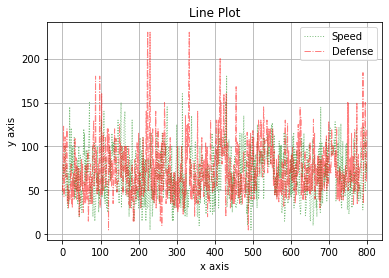

In [8]:
# LINE PLOT 
#kind= grafiğin türü (line/scatter/histogram)
#label= etiket
#linewidth= çizgilerin kalınlığı
#alpha= opaklık
#grid= grafiğin kareli bir yüzeyden oluşup oluşmayacağını boolean(True/False) olarak belirtir
#linestyle= çizgilerin stli (-. / :)

data.Speed.plot(kind='line', color='g', label='Speed', linewidth=1, alpha= 0.5, grid= True, linestyle= ':')
data.Defense.plot(color='r', label='Defense', linewidth= 1, alpha= 0.5, grid= True, linestyle='-.')

plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

# legend = grafiğin içerisine bu etiketlerin küçük bir tablo olarak konulmasını sağlar.
# xlabel ve ylabel olarak belirttiğimiz değerler x ve y eksenlerinin başlıklarıdır, title ise grafiğin başlığıdır. 
# x ekseninde pokemonlarımız, y ekseninde ise pokemonların hızı ve defansı(savunma değeri) yer almaktadır.

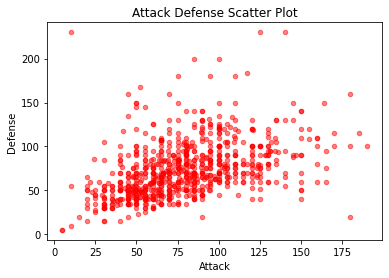

In [9]:
# SCATTER PLOT
# x eksenine data'nın attack, y eksenine data'nın defense değerlerini alıyoruz. Burada aldığımız özelliklerin veri dosyasında bulunan columns isimleri ile yazdığımız isimler aynı olmalıdır yoksa hata alırız.

data.plot(kind= 'scatter', x= 'Attack', y= 'Defense', alpha= 0.5, color= 'red')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')
plt.show()

Scatter plot'ta gördüğümüz gibi x ve y eksenleri sırasıyla attack ve defense olarak belirlenmiş ve bakıldığında iki bölümü sol alt köşeden sağ üst köşeye doğru bir çizgi ile ayırdığımızı varsayarsak attack değeri arttıkça defense değeri de artmıştır, bu yüzden bu iki feature positive correlation'a sahiptir deriz. 

Burada yaptığımız işlemin aynısını plt.scatter() ile de yapabiliriz.

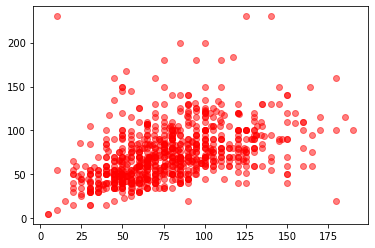

In [10]:
plt.scatter(data.Attack, data.Defense, color="red", alpha=0.5)
plt.show()

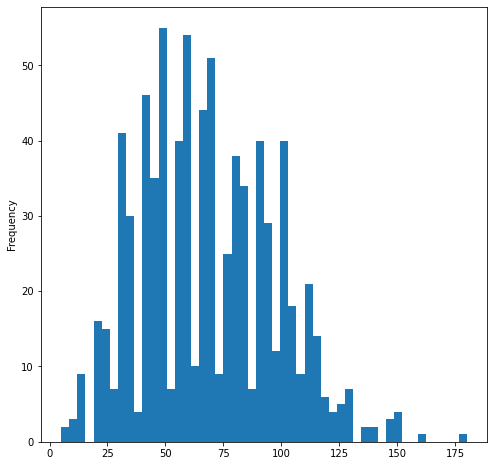

In [11]:
# HISTOGRAM PLOT
# bins= grafikteki sütun sayısı

data.Speed.plot(kind='hist', bins=50, figsize=(8,8))
plt.show()

Pokemonların sahip olduğu hız değerleri x ekseninde gözükürken, y ekseni ise bu hızların frekansını vermektedir. 

Örneğin yaklaşık 5 tane pokemonun hızını 150 olarak görüyoruz. Yaklaşık 55 tane pokemonun hızı ise 50'ye yakın durumda. Frekans değerinden kaç tane pokemon olabileceği çıkarımını yapıp hızına bakıyoruz.

In [12]:
data.Speed.plot(kind='hist', bins=50, figsize=(8,8))
plt.clf()

<Figure size 576x576 with 0 Axes>

plt.clf() ile oluşturduğumuz plot'u silebiliriz.

**DICTIONARY**

Key ve value değerlerini bulundurur. Örneğin: dictionary={'spain':'madrid'} yapısında, key= spain, value= madrid olur.

Dictionary'ler listelerden daha hızlı olduğu için kullanırız.

In [13]:
dictionary={'spain':'madrid', 'usa':'vegas'}
print(dictionary.keys())
print(dictionary.values())

#bu şekilde key ve value değerlerini yazdırabiliriz.

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [14]:
print(dictionary)

dictionary['spain']= "barcelona"
print(dictionary)
# mevcut değeri güncelleme:
# spain key değerinin sahip olduğu value değiştirildi ve barcelona yapıldı.

dictionary['france']= "paris"
print(dictionary)
# yeni key ve value ekleme:
# key= franece, value= paris

del dictionary['spain']
print(dictionary)
# key ve value silme:
# spain key değerini silince sahip olduğu value da silinir

print('france' in dictionary)
# dictionary içerisinde france key'inin olup olmadığına bakar

dictionary.clear()
print(dictionary)
# dictionary'nin içeriğini temizleme

# eğer dictionary'i tamamen bellekten silmek ve yer kaplamasına engel olmak istersek
# del(dictionary) # delete işlemi yaparız
# print(dictionary) # artık bellekte dictionary olmadığı için yazdırma işlemi yapılırsa hata alınır

{'spain': 'madrid', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


**PANDAS**

* **Series** = Tek boyutlu veri yapılardır. Metodları dataframe'den farklıdır.

* **Data Frame** = Çok boyutlu veri yapılarıdır. Excel tabloları gibi satır ve sütunlardan oluşurlar.

Pandas bu iki yapıdan oluşmaktadır.
Pandas kullanırken csv uzantılı veri dosyaları import edilir.

In [15]:
data= pd.read_csv('../input/pokemon-challenge/pokemon.csv')

In [16]:
series = data['Defense']
print(type(series))
#Seriler tek köşeli parantez [] içerisine yazılırken,

data_frame= data[['Defense']]
print(type(data_frame))
#Veri çerçeveleri [[]] iç içe köşeli parantezler içerisine yazılır.

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Pandas ile filtrelemeye geçmeden önce python ile karşılaştırma operatörlerini gözden geçirmekte fayda var.

* Comperasion operator: ==, <, >, <=, >=
* Boolean operator: and, or, not

In [17]:
print(3>2)
print (3!=2)
print(True and False)
print(True or False)

True
True
False
True


In [18]:
# * Filtering Pandas Data Frame *
x= data['Defense']> 200
data[x]

# Verideki Defense özelliği 200'den büyük olan pokemonları x'e atadık
# daha sonra bu pokemonları yazdırdık. Yani sadece True değer veren(200'den büyük olan) pokemonlar bulunmuş oldu

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [19]:
data['Defense']>200
# bu şekilde yazarsak boolean olarak tek tek tüm pokemonların 200'den büyük olup olmadığı değerlendirilecektir.

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Defense, Length: 800, dtype: bool

In [20]:
# * Filtering Pandas with logical_and *

data[np.logical_and(data['Defense']>200, data['Attack']>100)]

# Bu şekilde filtrelemede ise aynı pokemonda hem Defense feature'ı 200'den büyük hem de Attack feature'ı 100'den büyük olanlar bulunur.
# Sadece bu iki koşulu sağlayan pokemonlar True değeri verir.
# logical_and metodu np olarak kısalttığımız numpy kütüphanesinin bir metodudur.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [21]:
# bu logical_and metodu kullanılmadan iki koşul & (and) operatörü ile de sağlanabilir.
data[(data['Defense']> 200) & (data['Attack']> 100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


**WHILE AND FOR LOOPS**

In [22]:
lis= [1,2,3,4,5]
for i in lis:
    print('i is: ', i)
print('')
#listedeki tüm elemanları for döngüsü ile yazdırdı.

for index, value in enumerate(lis):
    print(index,":",value)
print('')
# bir enumerate listedeki değerler value'nun içine, indexler ise indexin içine atanır.
# hem listenin indexi hem de değeri aynı anda yazdırılır.
# tüm liste for döngüsü ile okunur.

dictionary = {'spain':'madrid', 'france':'paris'}
for key, value in dictionary.items():
    print(key,":",value)
print('')
# dictionary.items() dictionary içerisindeki tüm key ve value değerlerini verir.

for index,value in data[['Attack']][0:1].iterrows():
    print(index,":",value)
# pandas'ta ilk elemanın (bunu [0:1]'den anlıyoruz 0'dan 1'e kadar olan elemanlar anlamına geliyor bu da ilk elemandır) Attack değerini ve indexini yazdırıyoruz.
# index'e ulaşmak için .iterrows() kullanıyoruz.

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0 : 1
1 : 2
2 : 3
3 : 4
4 : 5

spain : madrid
france : paris

0 : Attack    49
Name: 0, dtype: int64


**USER DEFINED FUNCTION**
* **Docstring**: İçerisine tanımlandığı fonksiyonun ne return ettiğini ifade eden comment satırı gibi bir string. İç içe üç tırnak işareti arasına yazılır. """bu bir docstring'tir"""
* **Tuple**: Liste gibi içerisinden birden fazla değer bulunduran bir değişkendeki her değeri return ettirebilmek ve aynı zamanda içeriden istediğimiz değerleri seçebilmek için tuple kullanırız. Tuple'lar sıralı ve sonradan değiştirilemez değerlerdir.

In [23]:
def tuple_ex():
    """return defined t tuple"""
    t=(1,2,3)
    return t
a,b,c= tuple_ex()
print(a,b,c)

# Burada 1,2,3 değerleri a,b,c yerine atanmıştır ve yazdırma işleminin sonucu 1,2,3 olur.


1 2 3


**SCOPE** : Kapsama alanı
* global: main body'de tanımlananlara denir
* local: metodların içerisinde tanımlananlara denir
* built in scope: python'da bazı isimler önceden tanımlanmıştır biz bu isimleri kullanarak değişken oluşturamayız. Örneğin print, len...

In [24]:
x=2
def f():
    x=3
    return x
print(x)        # global değişken olan x=2 'yi döndürür
print(f())      # local değişken olan x=3 'ü döndürür

2
3


Eğer local scope yoksa, global'deki değer local'de kullanılır.

In [25]:
#local scope yoksa:
x=5
def f():
    y= 2*x
    return y
print(f())

# global x değeri f() fonksiyonunun içerisinde kullanılır.

10


In [26]:
#built in scope değerleri öğrenebilmek için aşağıdaki kodu kullanırız
import builtins
dir(builtins)
# buradaki tüm isimler değişken olarak kullanılamaz.

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

**NESTED FUNCTION**

In [27]:
def square():
    """return square  of value"""
    def add():
        """add two local variable"""
        x= 2
        y= 3
        z= x+y
        return z
    return add()**2
print(square())

25


**DEFAULT AND FLEXIBLE ARGUMENTS**

In [28]:
# default arguments
# fonksiyonun içerisinde en başta tanımlanır

def f(a, b=1, c=2):
    y= a+b+c
    return y
print(f(5))
# burada b ve c default olarak tanımlanmış, a ise print içerisinde f fonksiyonundan istenen değere sahip olur.
# yani a=5 b=1 c=2 olacaktır ve fonksiyondaki işlem buna göre yapılıp return edilecektir.

# eğer print(f(5, 4, 3)) olarak tanımlarsak default değerlere ne olur?
# default değrelere yeni değerler yollarsak default yok sayılır ve yeni yollanan değerlere göre işlem yapılır.
print(f(5, 4, 3))

8
12


In [29]:
# flexible arguments *args : bir veya birden fazla değer tutabilir.
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)

# args bir liste olarak düşünülebilir, 1,2,3,4 değerlerini tutarak fonksiyon ile sırası ile yazdırır.
# her seferinde tek bir değer yollamaktansa tüm değerler aynı anda yollanır.

# flexible arguments **kwargs that is dictionary : birden fazla key ve value tutabilir.
# dictionary'lerde key ve value değerleri bulunurdu burada da kwargs bir dictionary'dir. Yollanan key ve value'leri tutar.
def f(**kwargs):
    """print key and value of dictionary"""
    for key, value in kwargs.items():
        print(key," ", value)
f(country= 'spain', capital= 'madrid', population= '123456')

1

1
2
3
4
country   spain
capital   madrid
population   123456


**LAMBDA FUNCTION**

In [30]:
square= lambda x: x**2
print(square(4))
# burada lambda x, 'def square(x):' gibi bir tanımlama yapmadan aynı işlevde kullanılır.

16


**ANONYMOUS FUNCTION**

In [31]:
number_list= [1,2,3]
y= map(lambda x:x**2, number_list)
print(list(y))

# anonymous function aynı lambda gibidir yalnızda yukarıda da görüldüğü gibi bir listeyi bir lambda fonksiyonun atayarak işlem yapabiliriz.

[1, 4, 9]


**ITERATORS**

 

In [32]:
# bir iterable ifadenin içerisinde next(it) denildiğinde ilk harfi, print(*it) denildiğinde tüm harfleri vermektedir.
name= "ronaldo"
it= iter(name)
print(next(it))
print(*it)

r
o n a l d o


**ZIP AND UNZIP**
Zip işlemi bilgisayarlarımızda dosyaları sıkıştırma anlamına gelmektedir fakat python'da birleştirme için kullanılır. Listeler zip ile birleştirilir, unzip ile ayrılır.

In [33]:
# zip
list1= [1,2,3,4]
list2= [5,6,7,8]
z= zip(list1, list2)   # iki liste birleştirildi
print(z)               # z nesnesi yaratıldı
z_list= list(z)        # bu z nesnesi z_list adında bir listeye dönüştürüldü  
print(z_list)          # liste yazdırıldı

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [34]:
# unzip
un_zip= zip(*z_list)
un_list1, un_list2 = list(un_zip)  
print(un_list1)
print(un_list2)
print(type(un_list2))

# liste unzip edilirken 2 tane listeye alınmalıdır çünkü birleştirirken 2 liste birleştirmiştik.
# listenin type'ı tuple'a döndü bunu liste türüne çevirmek istersek aşağıdaki şekilde yazarız
print(type(list(un_list2)))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>
<class 'list'>


**LIST COMPREHENSION**
Tek satırda döngüleri kullanarak listeler oluşturur.

In [35]:
num1= [1,2,3]
num2= [i+1 for i in num1]   # num1 iterable obje, for iterator, işlem ise iteration işlemidir.
print(num2)

[2, 3, 4]


**CLEANING DATA**

**DIAGNOSE DATA FOR CLEANING**
* Unclean Data Nedir?
 * Veri içerisinde, büyük küçük harf ya da boşluk içeren kelimelere sahip sütun isimleri.
 * Kayıp veri (NaN) içeren hücreler.
 * Birden farklı dilde oluşturulmuş kelimeler.
 
Verileri teşhis etmek için head, tail, shape ve info metodlarını kullanacağız.

In [36]:
data= pd.read_csv('../input/pokemon-challenge/pokemon.csv')
data.head()  # default olarak ilk 5 satırı gösterir

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [37]:
data.tail()  #default olarak son 5 satırı gösterir.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [38]:
data.columns  # sütun isimlerini verir, bunlar feature'ların isimleridir.

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [39]:
data.shape # verideki satır ve sütun sayılarını verir

(800, 12)

In [40]:
data.info() # veri dosyasında bulunan feature'ları, veri tiplerini, veri sayısını vb. tüm gerekli bilgileri bulunduran bir tablo verir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


**EXPLORATORY DATA ANALYSIS**

**value_counts()**: Veri setindeki bir özelliğin frekansını verir. Bu demek oluyor ki pokemon veri setimizi düşünürsek, 800 pokemon arasından Type 1 özelliklerine bu metodu uygularsak, kaç pokemonun hangi türde olduğu sonucunu verecektir.

**outliers** : veri setinde bulunan en düşük değerden daha düşük veya en yüksek değerden daha yüksek değerlere sahip verilerdir.

* 1,4,5,6,8,9,11,12,13,14,15,16,17 

* **median**: 11   - dizinin ortanca elemanı
* **lower quartile (Q1)**: 6   - ilk eleman ile median arasındaki ortanca eleman yani 1 ile 11 arası.
* **upper quartile (Q3)**: 14  - median ile son eleman arasındaki ortanca eleman yani 11 ile 17 arası.

Outlier'in nasıl hesaplanacağına bakacak olursak, yani biz veri setinde bulunan değerlerden ne kadar daha düşük veya ne kadar daha yüksek değer bulursak bu outlier'dır demeliyiz ? Yukarıda da belirtildiği gibi lower quartile Q1 olsun, upper quartile Q3 olsun.

* (Q3-Q1)= IQR  --> Q3 ile Q1 arasındaki mesafeye IQR dersek, 
* Q1-1.5*IQR -->en küçük değerin altında kalan outlier değerini verir.
* Q3+1.5*IQR -->en büyük değerin üstünde kalan outlier değerini verir.

**descirbe()**: bu metod ile aşağıdaki değerler hesaplanır.
* count: girdilerin sayısı
* mean: girdilerin ortalaması
* std: standart sapma
* min: minimum girdi
* 25%: ilk quartile (Q1 demiştik)
* 50%: median ya da ikinci quartile
* 75%: üçüncü quartile (Q3 demiştik)
* max: maksimum girdi

In [41]:
print(data['Type 1'].value_counts(dropna= False))
# görüldüğü gibi 112 su pokemonu, 98 normal pokemon vb. vardır.

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [42]:
data.describe()  
# null değerleri dikkate almaz.

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Not: Bu gibi hesaplamalarda ortalama ve median arasında büyük fark olduğuna dikkat edilmedir. Ortalama tüm verileri alıp bir sonuç üretirken, median dizideki ortanca elemanı vererek veri setinde bulunan değerler hakkında daha az yanıltıcı kararlar alınmasını sağlar.

Örneğin verilerimizin değerleri arasında büyük farklar olduğunu düşünelim, 
* 2, 5, 8, 4, 3, 1000, 200, 7, 4

Bu dizinin ortalmasını bulursak, 1233/9 = 137 eder. Bu ortalamayı ele alıp işlem yapacak olursak 2,3,4 gibi değerlere sahip veriler hakkında yanlış çıkarımlarda bulunmuş oluruz. Ama bu dizinin median'nını bulursak 3 olduğunu ve veri setindeki değerlerin aralığını görmüş oluruz. Daha doğru karar vermemizi sağlar.

**VISUAL EXPLORATORY DATA ANALYSIS**

**Box plots**: temel istatistik hesaplamalarını görselleştirmeye yarar.

<AxesSubplot:title={'center':'Attack'}, xlabel='Legendary'>

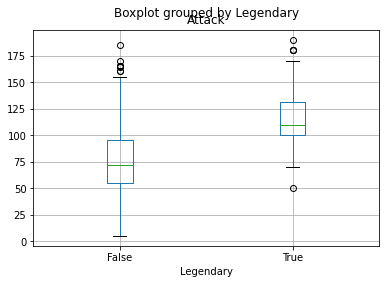

In [43]:
data.boxplot(column= 'Attack', by='Legendary')
# üstteki siyah çizgi max sınır
# üstteki mavi çizgi 75% quartile
# ortadaki yeşil çizgi median
# alttaki mavi çizgi 25% quartile
# alttaki siyah çizgi min sınır
# Legandary özelliği olmayan yani false olan pokemonlarda max sınırın üzerinde outlier'lar bulunuyor ama min sınırdan düşük outlier bulunmuyor.
# Legandary özelliği olan yani true  olan pokemonlarda min sınırın altında 1 outlier, max sınırın üstünde ise birden çok outlier'lar bulunmaktadır.
# Outlier'ların yoğunluğuna bakarak elimizdeki veriler hakkında yaptığımız tahminlerin ne kadar doğru olabileceği kararını verebiliriz.

**Tidy data with melt()**

In [44]:
data_new= data.head()
data_new
# ilk 5 veri ile yeni bir data oluşturalım

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [45]:
melted= pd.melt(frame=data_new, id_vars='Name', value_vars=['Attack', 'Defense'])
melted

# frame: eritilecek data
# id_vars: verinin hangi özelliğe göre alınacağı
# value_vars: verinin hangi özelliklere göre melt işlemi yapılacağı (eritileceği)

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


Örneğin attack ve defense özelliklerine göre bir görselleştirme işlemi yapmak istiyoruz, bunun için verimizi düzenlememiz gerekir. Bu noktada melt işlemi yaparak sadece istediğimiz özellikleri alıyoruz ve  değerlerini verimizde bulunan her bir pokemon için buluyoruz.

**Pivoting Data**
Eritilen veriyi eski haline çevirme. Reverse of melting.

In [46]:
melted.pivot(index='Name', columns='variable', values='value')
# melted tablodaki variable sütununu ve value sütununu seçip index'e göre pivot etti.
# index'imiz name çünkü melt işlemi yaparken name feature'ına göre işlem yapmıştık.

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


**CONCATENATING DATA** İki dataframe'i  birleştimek.

In [47]:
# Vertical Concatenating
data1= data.head()
data2= data.tail()
# birlşetirilecek iki dataframe, veri setinin ilk 5 ve son 5 verisinden oluşmaktadır

conc_data_row= pd.concat([data1, data2], axis=0, ignore_index= True)
conc_data_row

# ignore_index= True olması, birleştirilen iki tablonun indexlerini dikkate alamdan yeni 0-9'a index verilmesi demektir.
# Bu yapılmasaydı 5.indexten sonra 796.index gelecekti

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [48]:
# Horizontal Concatenating
data1= data['Attack'].head()
data2= data['Defense'].head()

conc_data_col= pd.concat([data1, data2], axis=1)
conc_data_col
# verimizin ilk 5 satırını iki feature'a göre birleştirme.
# axis=1 demek bu özelliklerin horizontal(yatay) olarak birleştirilmesi demektir.

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


**DATA TYPES**
<br>5 temel veri tipi bulunur: object(string), boolean, integer, float ve categorical.
<br>Veri tipleri arasında dönüşüm uygulayabiliriz

In [49]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [50]:
data['Type 1']= data['Type 1'].astype('category')
data['Speed']= data['Speed'].astype('float')
# Type 1'in veri tipini category'e, Speed'in veri tipini ise float'a çevirdik.

In [51]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

**MISSING DATA AND TESTING WITH ASSERT**
<br>Missing data: Veride daha önce tanımlanmamış, değersiz şeylerdir. (NaN)
Missing data için çözümler:
<br>
* olduğu gibi bırakma
* missing data'ları veri setinden çıkarma
* missing data'ları NaN ile doldurabiliriz (hücrede hiçbir şey yazmıyorsa)
* missing value sayısal bir değerse, diğer dataların değerlerine bakarak median gibi değerler ile doldurabiliriz.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


414 pokemonun Type 2 değeri var ise 386 tane pokemonun Type 2 değeri bulunmamaktadır.

In [53]:
data["Type 2"].value_counts(dropna= False)
# dropna= false ifadesi ile NaN veriler atılmadan özelliklerin frekansına bakalım ve kaç tane NaN değer olduğunu görelim.

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [54]:
data1=data
data1["Type 2"].dropna(inplace= True)
# dropna true olması, Type 2 özelliği NaN olan verileri, veri setinden atması demektir.
# inplace= true olması ise NaN değerlerin atıldığı data'yı data1'in içerisine aktarmasını sağlar.

In [55]:
# ASSERT
# Eğer assert durumu doğruysa hiçbir şey döndürmez.
# Örneğin
assert 1==1 # doğru olduğu için bir sonuç döndürmez.
# assert # 1==2 hatalı olduğu için hata döndürür.

In [56]:
# assert data1['Type 2'].notnull().all()   # burada neden hata aldım ?
# çünkü data1["Type 2"].dropna(inplace= True) ifadesi ile NaN olan hücreler boşaltılıyor ve dataframe'de hâlâ boş hücreler bulunuyor

In [57]:
# bu boş hücreleri fillna() metodu ile dataframe'deki değerlerler ile orantılı değerlerle dolduruyoruz.
data1["Type 2"].fillna('empty',inplace = True)


In [58]:
# ve tekrar kontrol edince artık Type 2 sütununda boş ve NaN değere sahip hücre kalmadığı için hata almıyoruz.
assert  data1['Type 2'].notnull().all()

In [59]:
# aynı işlemi Type 2 sütunu özelinde yaparsak yine hata almanın önüne geçmiş oluruz çünkü dropna() metodu kullanıldığında NaN değere sahip tüm hücrelerin
# aslında dataframe'den atılması ve kontrol ettiğimizde hata almamamız gerekiyor ama bunu Type 2 feature özelinde yaptığımızı belirtmediğimiz için diğer hücreler de
# dikkate alınıyor. Bu yüzden burada subset=["Type 2"] diyerek sadece Type 2 feature'ına odaklanması gerektiğini belirtiyoruz.
data1= data
data1.dropna(subset=["Type 2"], inplace= True)

In [60]:
# ve artık herhangi bir hata ile karşılaşmıyoruz.
assert data1['Type 2'].notnull().all()

**REVIEW of PANDAS**
<br>single column= series
<br>NaN= not a number
<br>dataframe.values= numpy

**BUILDING DATA FRAMES FROM SCRATCH**
<br>Dataframe'ler csv uzantlı dosyalar olarak oluşturulabileceği gibi dictionaries kullanılarak da oluşturulabilir.<br>**Broadcasting**: dataframe'de yeni bir sütun oluşturup ona değerler atama.

In [61]:
# dictionary'den dataframe yaratmak.
country= ["Spain", "France"]
population= ["11","12"]
# country ve population adında iki listemiz var

list_label= ["country","population"]
list_col= [country, population]

# list_label ile list_col'u  zipleyerek iki listeyi birleştiriyoruz.
zipped= list(zip(list_label, list_col))
data_dict= dict(zipped)       # zip dosyasını dictionary'e çeviriyoruz.
df= pd.DataFrame(data_dict)   # dictionary'i dataframe'e çeviriyoruz.
df

,country,population
0,Spain,11
1,France,12


In [62]:
# yeni sütun ekleme
df["capital"]=["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [63]:
# broadcasting
df["income"]= 0  # yeni bir sütun eklenip içerisindeki tüm hücrelere 0 değeri atandı.
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


broadcasting'in tanımı yeni bir sütun oluşturup içerisine aynı değerleri atamaktır. İlk yaptığımız yeni sütun eklemede ise bir sütun oluşturup içerisine birden farklı değer atadığımız için broadcasting demedik.
>df["capital"]=["madrid","paris"]  --> broadcasting değil

**VISUAL EXPLORATORY DATA ANALYSIS**
* Plot
* Subplot
* Histogram
    * bins: bins saysısı
    * range(tuble): bins min ve max değerleri
    * normed(boolean): normalize mi değil mi (T/F)
    * cumulative(boolean): kümülatif hesaplama dağılımı (T/F)

<AxesSubplot:>

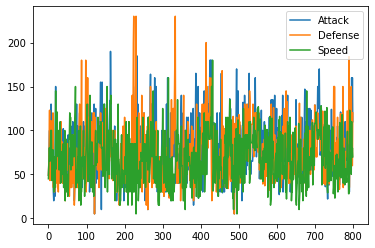

In [64]:
# Plotting all data
data1= data.loc[:,["Attack","Defense", "Speed"]]
data1.plot()

Bu tablo çok karmaşık bunu çözmek için subplots kullanalım.

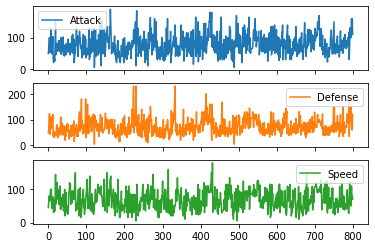

In [65]:
# subplots
data1.plot(subplots= True)
plt.show()

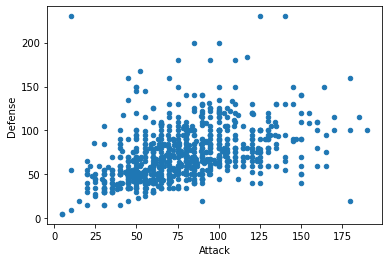

In [66]:
# scatter plot
data1.plot(kind= "scatter", x="Attack", y="Defense")
plt.show()  # tablonun üstünde çıkan yazının kaybolması için kullanıyoruz.

<AxesSubplot:ylabel='Frequency'>

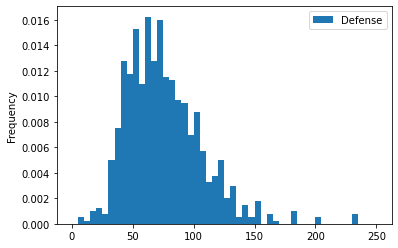

In [67]:
data1.plot(kind="hist", y="Defense", bins=50 , range=(0,250), density=True, stacked=True)
# matplotlib kütüphanesi güncellendiği için artık normed parametresi yerine density ve stacked parametreleri kullanılmaktadır.
# burada range=(0,250) ifadesi y eksieninin aralığını belirler.
# density ile veri normalize edilip 0-1 aralığında frekansı oluşturulur.

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

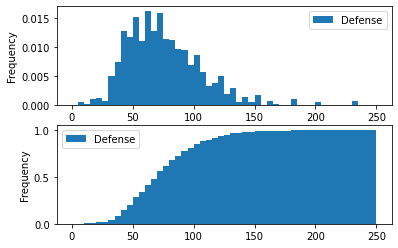

In [68]:
# non-cumulative ve cumulative histogram subplot oluşturmak

# non-cumulative
fig, axes= plt.subplots(nrows= 2, ncols=1)
data1.plot(kind="hist", y="Defense", bins=50, range=(0,250), density=True, ax= axes[0])

# cumulative 
data1.plot(kind="hist", y="Defense", bins=50, range=(0,250), density=True, ax= axes[1], cumulative= True)

plt.savefig('graph.png')
plt

# axes[0] üstteki, axes[1] alttaki grafiği temsil etmektedir.

**Cumulative** olması demek, her değer kendinden önceki değerlerin üstüne eklenerek bir plot oluşturulması demektir.

**INDEXING PANDAS TIME SERIES**
* datatime: int, string gibi bir veri yapısıdır.
* parse_dates(boolean): içerisine yazılan tarihi ISO 8601 (yyyy-mm-dd hh:mm:ss) formatına çevirir.

In [69]:
# pokemon veri setimizde time yapısı olmadığından dolayı 'time series' örneği yapabilmek için veri setine time eklemeliyiz.
# öncelikle pandas datetime object nasıl oluşturulur bakalım.

time_list= ["1992-03-08", "1992-04-12"]       # burada string ifadelerin yer aldığını görebiliyoruz
print(type(time_list[1]))                     # bu listenin type'ı bulunup yazdırılıyor.
datetime_object= pd.to_datetime(time_list)    # bu type pandas datatime type'ına dönüştürülüyor.
print(type(datetime_object))                  # datetime_object'in type'ı yazdırılıyor.

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [70]:
# pokemon dataset'e time ekleme

# close warnings
import warnings
warnings.filterwarnings("ignore")     
# tüm uyarıları devre dışı bıraktık.

# dataframe'deki ilk 5 veriye time list ekleyelim
data2= data.head()  # verinin bir kopyasını data2 değişkenine atarak yapılacak hataların ana veriyi etkilemesinin önüne geçiyoruz.
date_list= ["1992-01-10", "1992-02-10", "1992-03-10", "1993-03-15", "1993-03-16"]
datetime_object= pd.to_datetime(date_list)   # date_list datetime object'e çevirildi
data2["date"]= datetime_object               # data2'ye date olarak bu obje eklendi

data2= data2.set_index("date")
data2
# data2'de bulunan index sütunu date olarak değiştirlerek az önce data2'nin, date indexine atanan date time object, date sütununa yerleştirilmiş oldu.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
1993-03-16,5,Charmander,Fire,empty,39,52,43,60,50,65.0,1,False


In [71]:
# loc ile data'daki istenen indexten veri çekebiliyorduk
# data2 verimizde index artık date'ler ile temsil edildiğinden 
# istediğimiz tarihteki verileri çekebiliriz.
print(data2.loc["1993-03-16"])

# iki tarih  arasındaki tüm pokemonları ve özelliklerini yazdırabiliriz.
print(data2.loc["1992-03-10":"1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2             empty
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed               65.0
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire   empty  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100   80.0           1      False  
1993-03-15      120   80.0           1      False  
1993-03-16       50   65.0           1      False  


**RESAMPLING PANDAS TIME SERIES**
<br><br> "M" harfini kullanarak tüm ayları resample edebiliriz, aynı şekilde "A" harfini kullanarak tüm yılları resample edebiliriz.
* M= month
* A= year 
* resample: bir data içerisinden elde edilen yeni sample anlamına gelir.

In [72]:
data2.resample("A").mean()
# resample et ve ortalamasını(mean) al

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,0.0
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,0.0


* 1992 yılındaki tüm pokemonların HP değerlerinin ortalaması 61.6667'dir.
* veride iki tane yıl olduğundan bu iki yıla ait tüm verileri alarak işlem yapılmaktadır

In [73]:
# bu sefer aylara göre resample oluşturalım
data2.resample("M").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Aylara göre resample yaparken, veride bulunan yıl ve ay aralığında kalan tüm aylar yukarıda görüldüğü gibi yazdırılır. Sonrasında veride bulunmayan tarihlerin değerleri NaN olarak belirtilir.
* Veride 1992 yılında 1.aya ait sadece tek bir satır bulunmaktadır bu yüzden değerlerde bir değişiklik olmamıştır.
* 1993 yılında 3.aya ait verilere baktığımızda 2 satır veri bulunmaktadır o yüzden HP değerlerini ele alırsak  bu iki satırın ortalamsını alacaktır
* 1993 yılının 3. ayından sonra herhangi bir veri yazdırılmadı çünkü verilen aralıktaki en erken tarih ile en geç tarih arasındaki tüm aylar yazdırılmaktadır. Bu sebeple burada 3. ayın son günü olan 31.03.1993 değeri en sonda yer almaktadır. Sonrasında 4. aya geçilmemiştir çünkü verimizdeki en geç tarih 3. ayda bitmektedir.

Yukarıdaki tabloda NaN olarak belirtilen hücreleri dolduralım.

In [74]:
data2.resample("M").mean().interpolate("linear")
# linear olarak doldurması, sütunda bulunan değerlere göre doldurması demektir.

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


**INDEXING DATA FRAMES**
* Indexleme yaparken köşeli parantezler kullanılır. "[]"
* Sütun ve satır etiketleri kullanılır.
* loc accessor kullanılır.
* Bazı sütunlar seçilir.

In [75]:
data= pd.read_csv('../input/pokemon-challenge/pokemon.csv')
data= data.set_index("#")   
data.head()

# '#' sembolüne sahip sütun indexleri belirtiyordu ve default olarak 0'dan başlar.
# set_index yaparak # sütununun 1'den başlamasını sağlıyoruz. artık 0.inex yok 0.indexteki değerler 1.indexe kaydırıldı.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [76]:
data["HP"][1]
# köşeli parantez kullanarak 1.indexteki HP değerini aldık.

45

In [77]:
data.HP[1]
# sütun ismini kullanarak 1.indexteki HP değerini aldık.

45

In [78]:
data.loc[1,["HP"]]
# loc accessor kullanarak 1.indexteki HP değerini aldık
# location [1.satır, ["HP"]sütunu]

HP    45
Name: 1, dtype: object

In [79]:
data[["HP","Attack"]]
# sadece bazı sütunları seçtik.

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
...,...,...
796,50,100
797,50,160
798,80,110


**SLICING DATA FRAME**
* Slicing bize aralık seçme imkanı vermektedir.

In [80]:
print(type(data["HP"]))   # series
print(type(data[["HP"]])) # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [81]:
# slicing and indexing series
data.loc[1:10,"HP":"Defense"]

# 1.indexten 10.indexe kadar ve HP-Defense aralığını seç (sınırlar dahil)

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [82]:
# reverse slicing (tersine çevirme)
data.loc[10:1:-1,"HP":"Defense"]

# 10:1:-1 = 10'dan 1'e ters çevir

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [83]:
# speed sütunundan sona kadar al
data.loc[1:10,"Speed":]

# en baştan generation sütununa kadar al
# data.loc[1:10,:"Generation"] 

,Speed,Generation,Legendary
#,,,
1,45,1,False
2,60,1,False
3,80,1,False
4,80,1,False
5,65,1,False
6,80,1,False
7,100,1,False
8,100,1,False
9,100,1,False


**FILTERING DATA FRAMES**


In [84]:
boolean= data.HP > 200
data[boolean]
# data.HP > 200 olan tüm satırları yazdırır.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [85]:
# filtreleri birleştirme
first_filter = data.HP > 150
second_filter= data.Speed > 35
data[first_filter & second_filter]
# HP > 150 olan ve aynı zamanda Speed > 35 olan satırları alır.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [86]:
# diğer feature değerlerine göre feature filtreleme
data.HP[data.Speed<15]
# HP özelliği Speed özelliğine göre filtrelendi.
# Hıza göre filtrelenen pokemonların HP değerini verir.

#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64

**TRANSFORMING DATA**


In [87]:
def div(n):
    return n/2
data.HP.apply(div)

# bir bölme işlemini data'nın HP feture'ına uygula  

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [88]:
# lambda metod yazmanın kısa yoludur.
data.HP.apply(lambda n: n/2)
# n input alıp 2'ye böl, HP sütununun hepsinde bu işlemi uygula

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [89]:
# diğer sütunları kullanarak yeni sütun oluşturma
data["total_power"]= data.Attack + data.Defense
data.head()
# Attack ve Defense feature değerlerini toplayarak yeni feature oluşturuldu.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


**INDEX OBJECTS AND LABELED DATA**


In [90]:
print(data.index.name)
data.index.name="index_name"
data.head()
# index'lerin adı index_name olarak değiştirildi.

#


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [91]:
data.head()
data3= data.copy()

data3.index=range(100,900,1)  # 100den 900'e kadar 1er 1er indexi yeniden tanımlama
data3.head()                  # head dediğimiz için sadece ilk 5 sample gözükür.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
101,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
102,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
104,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


**HIERARCHICAL INDEXING**

In [92]:
data= pd.read_csv('../input/pokemon-challenge/pokemon.csv')
data.head()

# veri'nin bozulmuş olma ihtimaline karşı ara ara tekrar import ediyoruz.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [93]:
data1= data.set_index(["Type 1", "Type 2"])
data1.head(100)
# Type 1 outer, Type 2 inner index olmaktadır. Yani outer index ilk, inner ise ikinci index oluyor.

#           Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                               
Grass  Poison    1      Bulbasaur   45      49       49       65       65   
       Poison    2        Ivysaur   60      62       63       80       80   
       Poison    3       Venusaur   80      82       83      100      100   
       Poison    4  Mega Venusaur   80     100      123      122      120   
Fire   NaN       5     Charmander   39      52       43       60       50   
...            ...            ...  ...     ...      ...      ...      ...   
Poison NaN      96         Grimer   80      80       50       40       50   
       NaN      97            Muk  105     105       75       65      100   
Water  NaN      98       Shellder   30      65      100       45       25   
       Ice      99       Cloyster   50      95      180       85       45   
Ghost  Poison  100         Gastly   30      35       30      100       35   

               Speed  Generation  Legendary  
Type 1 Type 2                                
Grass  Poison     45           1      False  
       Poison     60           1      False  
       Poison     80           1      False  
       Poison     80           1      False  
Fire   NaN        65           1      False  
...              ...         ...        ...  
Poison NaN        25           1      False  
       NaN        50           1      False  
Water  NaN        40           1      False  
       Ice        70           1      False  
Ghost  Poison     80           1      False  

[100 rows x 10 columns]

Daha önceki örneklerde Type 1 ve Type 2 feature iken şu an inner ve outer index oldular.

**PIVOTING DATA FRAMES**


In [94]:
dic={"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df=pd.DataFrame(dic)
df
# yeni bir dataframe yarattık

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [95]:
# pivoting bir dataframe'in farklı şekillerde yorumlanmasıdır
df.pivot(index="treatment", columns="gender", values="response")
# index treatment'e göre olsun yani A ve B, columns yani feature gender'a göre olsun F ve M
# values ise response değerleri olsun

gender,F,M
treatment,,
A,10,45
B,5,9


**STACKING AND UNSTACKING DATAFRAME**


In [96]:
df1= df.set_index(["treatment","gender"])
df1
# treatment outer, gender inner index oluyor.

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [97]:
# unstack: index'lerin birini çıkarır
# level: index numarası örneğin outer index=0 inner index=1
df.unstack(level=0)
# level= 0 : index 0 artık index olmasın anlamına gelmektedir.

treatment  0     A
           1     A
           2     B
           3     B
gender     0     F
           1     M
           2     F
           3     M
response   0    10
           1    45
           2     5
           3     9
age        0    15
           1     4
           2    72
           3    65
dtype: object

In [98]:
df1.unstack(level=1)
# burada da 1.index çıkarıldı.

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [99]:
# outer ve inner index olarak belirlediğimiz indexlerin yerini değiştirmek istersek
df2= df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


**MELTING DATAFRAMES**

In [100]:
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [101]:
# pivot'un tersidir melting
pd.melt(df, id_vars="treatment", value_vars=["age","response"])
# treatment sabit kalsın, diğer sütunların ne olacağı belirtilmediği için default olarak variable ve value gelir.
# variable'nin içeriği age ve response olsun value içeriği ise bu feature'ların değerleri olsun.

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9


**CATEGORICALS AND GROUPBY**

In [102]:
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [103]:
df.groupby("treatment").mean()
# treatment'e göre grupla ve ortalamasını al.
# iki adet treatment durumu var iki grup olacak. Bu iki grubun ortalaması alınıyor.

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [104]:
df.groupby("treatment").age.max()
# iki grup içerisindeki max age değerlerini buluruz.

treatment
A    15
B    72
Name: age, dtype: int64

In [105]:
df.groupby("treatment")[["age","response"]].min()
# treatment'e göre grupla, age ve response featurelarına göre min değerlerini bul.

,age,response
treatment,,
A,4,10
B,65,5
